In [96]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot configurations
% matplotlib inline

In [104]:
warehouses = pd.read_csv("Data/CSV/amazon_labelled_locations.csv")
moodys = pd.read_csv("Data/CSV/MoodysData-ACS.csv")

# Drop some columns we don't need, drop rows with that we know we don't have data for
moodys = moodys.drop("Unnamed: 0", axis=1)
moodys = moodys.drop("Include in Amazon Dataset", axis=1)
moodys = moodys.drop("Current Senior Most Rating*", axis=1)
cols = list(moodys.columns)
cols[0] = "County"
cols[2] = "Year"
moodys.columns = cols
moodys = moodys[moodys.Year.between(2012, 2015, inclusive=True)].reset_index(drop=True)
moodys = moodys[moodys.County != "Median"]
# moodys = moodys.apply(pd.to_numeric, errors="ignore", downcast="float")

In [105]:
moodys_2012 = moodys[moodys.Year == 2012]
moodys_2015 = moodys[moodys.Year == 2015]

In [106]:
joined = moodys_2012.merge(moodys_2015, on="County", suffixes=('_2012', '_2015'))
joined

,County,Code_2012,Year_2012,Tax Backed Rating Description_2012,State_2012,Population (ACS Data)_2012,Per Capita Income (ACS Data)_2012,Median Family Income (ACS Data)_2012,Median Home Value (ACS Data)_2012,Median Gross Rent (ACS Data)_2012,...,Population (ACS Data)_2015,Per Capita Income (ACS Data)_2015,Median Family Income (ACS Data)_2015,Median Home Value (ACS Data)_2015,Median Gross Rent (ACS Data)_2015,Occupied Housing Units (ACS Data)_2015,Seasonal Homes (ACS Data)_2015,No. Persons/Household (ACS Data)_2015,Median Age (ACS Data)_2015,% Below Poverty Level (ACS Data)_2015
0,"Abbeville County, SC",2273.0,2012.0,NaN,SC,"25,387","17,876","46,983","90,300",593,...,"24,997","18,112","44,918","88,300",562,"9,573",964,3.0,43.0,22.5
1,"Acadia Parish, LA",1079.0,2012.0,NaN,LA,"61,611","19,369","44,552","88,900",541,...,"62,163","20,552","46,837","91,000",535,"22,599",421,3.0,36.0,20.6
2,"Accomack County, VA",2762.0,2012.0,NaN,VA,"33,454","22,909","50,250","153,800",741,...,"33,115","23,231","49,807","153,300",733,"13,961","4,239",2.0,45.0,19.6
3,"Ada County, ID",616.0,2012.0,ISSUER LT RATING,ID,"394,961","27,522","67,060","193,300",821,...,"417,501","28,851","69,792","188,800",856,"157,286","1,187",3.0,36.0,12.4
4,"Adair County, IA",517.0,2012.0,LT SR GO,IA,"7,628","25,147","59,052","96,700",511,...,"7,426","25,990","58,738","89,600",553,"3,229",19,2.0,46.0,10.6
5,"Adair County, KY",960.0,2012.0,NaN,KY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Adair County, MO",1370.0,2012.0,NaN,MO,"25,542","18,331","53,256","99,300",531,...,"25,560","19,671","57,837","108,000",594,"9,635",324,2.0,28.0,26.9
7,"Adair County, OK",2094.0,2012.0,NaN,OK,"22,470","14,855","37,800","74,600",502,...,"22,236","16,247","40,303","76,600",526,"7,968",228,3.0,37.0,26.9
8,"Adams County, CO",225.0,2012.0,ISSUER LT RATING,CO,"442,996","24,357","64,335","188,100",947,...,"471,206","25,039","66,619","198,800","1,039","156,628",394,3.0,33.0,13.8
9,"Adams County, IA",518.0,2012.0,NaN,IA,"4,027","25,709","57,262","88,100",443,...,"3,892","26,428","58,659","87,800",538,"1,718",21,2.0,47.0,10.2


In [192]:
pop_percent_change = ((pd.to_numeric(joined["Population (ACS Data)_2015"].str.replace(",","")) -
 pd.to_numeric(joined["Population (ACS Data)_2012"].str.replace(",",""))) /
 pd.to_numeric(joined["Population (ACS Data)_2012"].str.replace(",",""))) * 100

Population


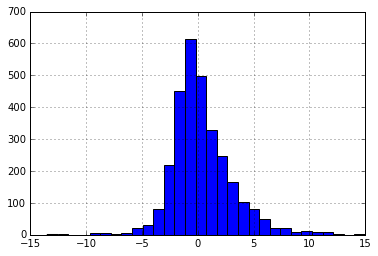

In [193]:
print("Population")
pop_percent_change[pop_percent_change.between(-15, 15)].hist(bins=30)

In [194]:
percap_income_change = ((pd.to_numeric(joined["Per Capita Income  (ACS Data)_2015"].str.replace(",","")) -
 pd.to_numeric(joined["Per Capita Income  (ACS Data)_2012"].str.replace(",",""))) /
 pd.to_numeric(joined["Per Capita Income  (ACS Data)_2012"].str.replace(",",""))) * 100

Per Capita Income


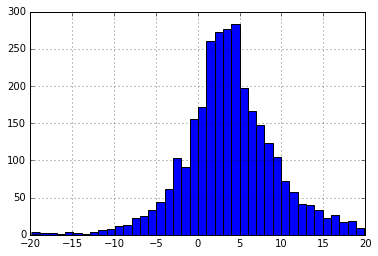

In [195]:
print("Per Capita Income")
percap_income_change[percap_income_change.between(-20, 20)].hist(bins=40)

In [196]:
home_value_change = ((pd.to_numeric(joined["Median Home Value (ACS Data)_2015"].str.replace(",","")) -
 pd.to_numeric(joined["Median Home Value (ACS Data)_2012"].str.replace(",",""))) /
 pd.to_numeric(joined["Median Home Value (ACS Data)_2012"].str.replace(",",""))) * 100

Median Home Value


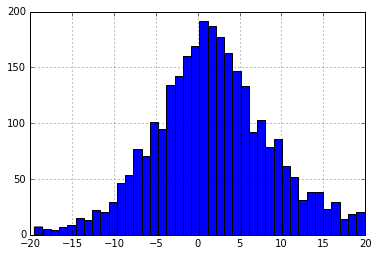

In [197]:
print("Median Home Value")
home_value_change[home_value_change.between(-20, 20)].hist(bins=40)